https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Logistic%20Regression%20balanced.ipynb

In [117]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [118]:
data = pd.read_csv('./data/bank-additional.csv', header=0, sep=';')
data.dropna()
print(data.shape)
print(list(data.columns))

(4119, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [119]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [120]:
data['education'].unique()

# filteredData = data[data['pdays']!= -1]

filteredData = data.copy()

filteredData['education']=np.where(filteredData['education'] =='basic.9y', 'Basic', filteredData['education'])
filteredData['education']=np.where(filteredData['education'] =='basic.6y', 'Basic', filteredData['education'])
filteredData['education']=np.where(filteredData['education'] =='basic.4y', 'Basic', filteredData['education'])

filteredData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [121]:
filteredData['y'].unique()
filteredData['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

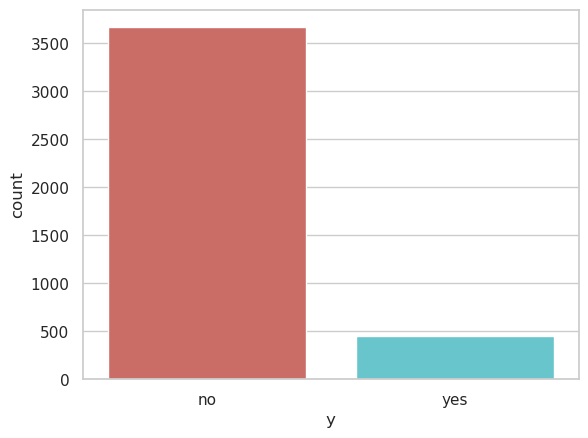

<Figure size 640x480 with 0 Axes>

In [122]:
data['y'].value_counts()
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

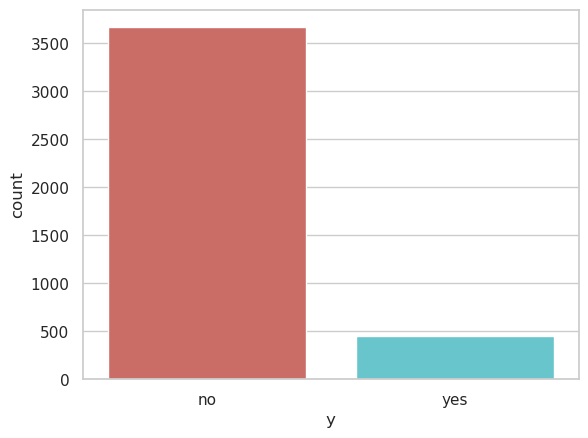

<Figure size 640x480 with 0 Axes>

In [123]:
filteredData['y'].value_counts()
sns.countplot(x='y', data=filteredData, palette='hls')
plt.show()
plt.savefig('count_plot')

In [124]:
count_no_sub = len(filteredData[filteredData['y']=='no'])
count_sub = len(filteredData[filteredData['y']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 89.0507404709881
percentage of subscription 10.949259529011895


In [125]:
filteredData.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
yes,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [126]:
filteredData.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.240119,261.871542,2.642292,944.025692,0.192688,0.061462,93.527008,-40.014723,3.601909,5165.542885
blue-collar,39.265837,261.852941,2.432127,983.270362,0.147059,0.235520,93.669430,-41.571493,3.742370,5174.265611
entrepreneur,42.202703,249.202703,2.216216,992.263514,0.141892,0.263514,93.614682,-40.839865,3.931493,5180.600000
housemaid,45.672727,229.663636,2.463636,980.909091,0.100000,0.426364,93.658536,-39.324545,4.009182,5179.862727
management,42.429012,246.799383,2.432099,953.015432,0.246914,-0.049691,93.483056,-40.591667,3.553451,5165.971914
retired,60.873494,311.789157,2.397590,897.301205,0.325301,-0.580120,93.487506,-39.034337,2.875741,5126.062048
self-employed,40.679245,254.924528,2.817610,967.691824,0.207547,0.086164,93.575283,-40.323899,3.669296,5166.974843
services,38.513995,232.529262,2.844784,978.773537,0.178117,0.067684,93.626059,-41.532061,3.552776,5165.806870
student,26.695122,287.134146,1.951220,902.426829,0.487805,-1.192683,93.448329,-39.665854,2.165354,5092.046341


In [127]:
filteredData.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,45.107623,263.163677,2.542601,972.255605,0.174888,0.143274,93.600547,-40.621973,3.707177,5170.145964
married,42.389398,256.289757,2.527700,964.162216,0.173774,0.172260,93.599039,-40.357114,3.728554,5170.724472
single,33.209020,254.647875,2.555941,947.338248,0.233304,-0.128448,93.529971,-40.768257,3.352657,5155.756114
unknown,42.272727,336.272727,2.545455,999.000000,0.090909,0.181818,93.537545,-39.690909,3.855182,5174.409091


In [128]:
filteredData.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144
high.school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000
professional.course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140
university.degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479


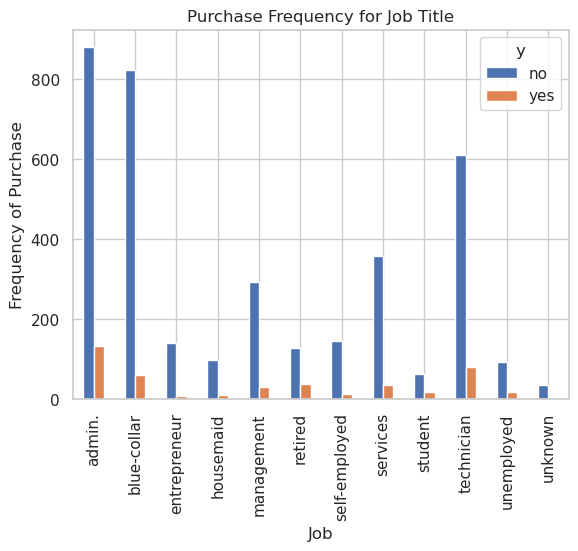

In [129]:
%matplotlib inline
pd.crosstab(filteredData.job,filteredData.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

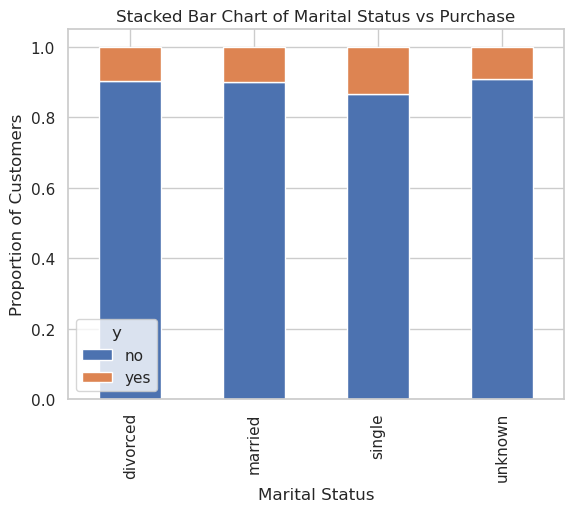

In [130]:
table=pd.crosstab(filteredData.marital,filteredData.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

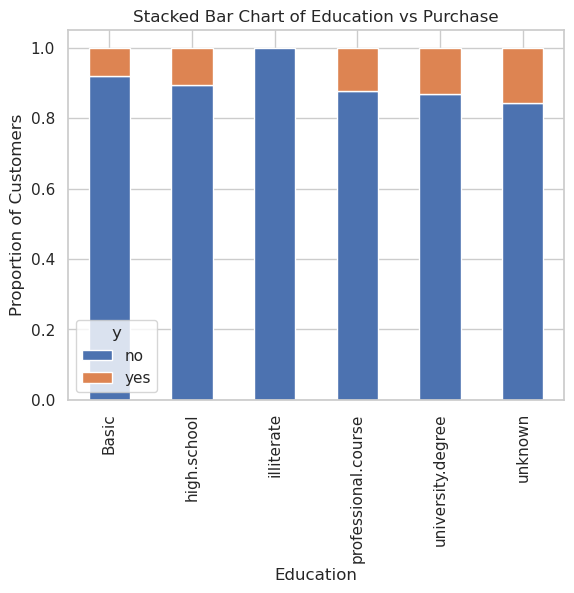

In [131]:
table=pd.crosstab(filteredData.education,filteredData.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

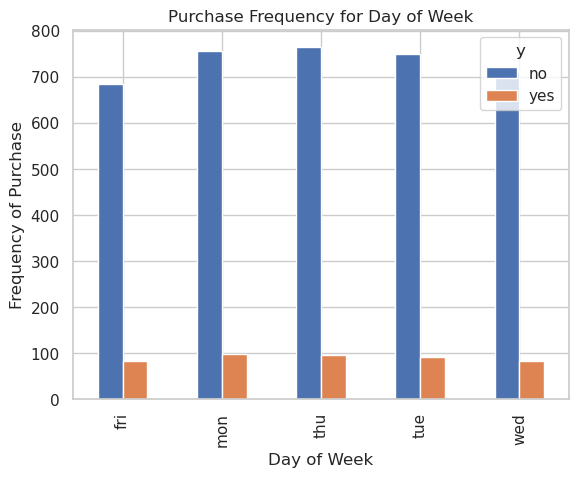

In [132]:
pd.crosstab(filteredData.day_of_week,filteredData.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

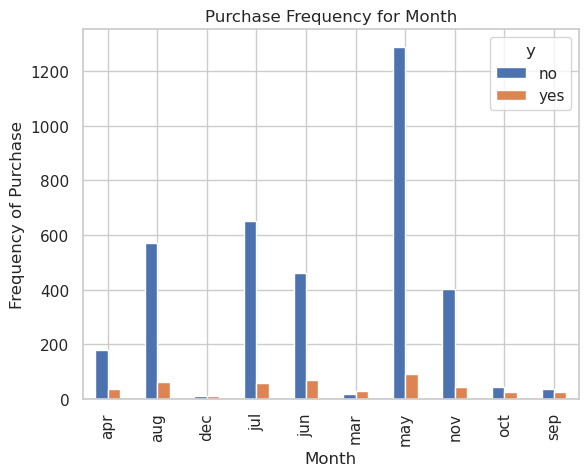

In [133]:
pd.crosstab(filteredData.month,filteredData.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

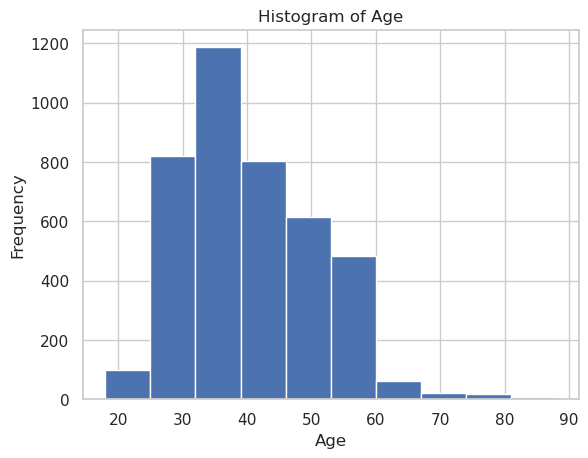

In [134]:
filteredData.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

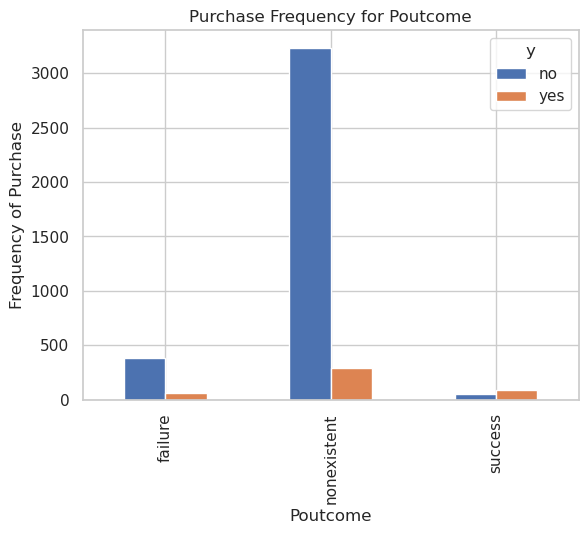

In [135]:
pd.crosstab(filteredData.poutcome,filteredData.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

The code below creates new dummy variables.
what is and what does a dummy variable?

In [136]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(filteredData[var], prefix=var)
    filteredData1=filteredData.join(cat_list)
    filteredData=filteredData1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
filteredData_vars=filteredData.columns.values.tolist()
to_keep=[i for i in filteredData_vars if i not in cat_vars]

In [137]:
data_final=filteredData[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [138]:
data_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


Over-sampling using SMOTE
With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:

Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.
We are going to implement SMOTE in Python.

In [153]:
from imblearn.over_sampling import SMOTE

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
y['y'] = y['y'].replace(['no', 'yes'], [0, 1])

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

/tmp/ipykernel_17681/3943028550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['y'] = y['y'].replace(['no', 'yes'], [0, 1])


In [154]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']=='no']))
print("Number of subscription",len(os_data_y[os_data_y['y']=='yes']))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='no'])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='yes'])/len(os_data_X))

length of oversampled data is  5108
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


In [155]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False False  True  True False  True  True  True False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True  True  True
 False]
[36 35 31 38 27 33 30 37 29 39 19 15 17 22 14 20 13 16 40 18 21 11  1  1
  2  5  1  1 41  1  1  1  4  3 42  1  1  1  1  1  1 25  6 23  8 34  9 24
 32 10  7 28 26  1  1  1  1  1  1  1 12]


In [156]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [158]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.379773
         Iterations: 35
                                                                  Results: Logit
Model:                                          Logit                                       Pseudo R-squared:                            0.452    
Dependent Variable:                             y                                           AIC:                                         3919.7600
Date:                                           2022-11-14 21:37                            BIC:                                         4050.5313
No. Observations:                               5108                                        Log-Likelihood:                              -1939.9  
Df Model:                                       19                                          LL-Null:                                     -3540.6  
Df Residuals:                                   5088                                        LLR p-value:              

/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
